In [400]:
import os
for dirname, _, filenames in os.walk('./spaceship-titanic/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./spaceship-titanic/test.csv
./spaceship-titanic/train.csv
./spaceship-titanic/submission.csv


In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [402]:
plt.style.use('ggplot')
sns.set_style('whitegrid')

In [403]:
train_file = './spaceship-titanic/train.csv'
test_file = './spaceship-titanic/test.csv'

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [404]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [405]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [406]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [407]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [408]:
# features = train_data.columns.tolist()
# X = train_data[features]
# y = train_data[features[:-1]]

In [409]:
train_shape = train_data.shape[0]
train_data.dropna(inplace=True, axis=0)
print('Number of NaN rows removed is: ', train_shape - train_data.shape[0])

Number of NaN rows removed is:  2087


In [410]:
test_shape = test_data.shape[0]
test_data.dropna(inplace=True, axis=0)
print('Number of NaN rows removed is: ', test_shape - test_data.shape[0])

Number of NaN rows removed is:  996


In [411]:
cols_obj_bool = list(train_data.select_dtypes(include=[object, bool]))
cols_obj_bool

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name',
 'Transported']

In [412]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [413]:
train_data[['Deck', 'DeckNum', 'Side']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['Deck', 'DeckNum', 'Side']] = test_data['Cabin'].str.split('/', expand=True)

In [414]:
cols = ['HomePlanet', 'Deck', 'Side', 'Destination']

for col in cols:
    col_name = np.unique(train_data[col]).tolist()
    print(f'Column "HomePlanet" has the following unique values: {col_name}')

Column "HomePlanet" has the following unique values: ['Earth', 'Europa', 'Mars']
Column "HomePlanet" has the following unique values: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
Column "HomePlanet" has the following unique values: ['P', 'S']
Column "HomePlanet" has the following unique values: ['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e']


In [415]:
cols = ['HomePlanet', 'Deck', 'Side', 'Destination']

for col in cols:
    col_name = np.unique(test_data[col]).tolist()
    print(f'Column "HomePlanet" has the following unique values: {col_name}')

Column "HomePlanet" has the following unique values: ['Earth', 'Europa', 'Mars']
Column "HomePlanet" has the following unique values: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
Column "HomePlanet" has the following unique values: ['P', 'S']
Column "HomePlanet" has the following unique values: ['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e']


In [416]:
bool_cols = ['CryoSleep','VIP','Transported']
for col in bool_cols:
    train_data[col] = pd.Series(np.where(train_data[col].values == True, 1, 0), train_data.index)

In [417]:
bool_cols = ['CryoSleep','VIP']
for col in bool_cols:
    test_data[col] = pd.Series(np.where(test_data[col].values == True, 1, 0), test_data.index)

In [418]:
train_data['BilledAmeni'] = train_data['RoomService'] + train_data['FoodCourt'] +\
train_data['ShoppingMall'] + train_data['Spa'] + train_data['VRDeck']
train_data.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin', 'Name'],
       inplace=True, axis=1)
train_data['Side'] = pd.Series(np.where(train_data['Side'].values == 'S', 1, 0), train_data.index)


In [419]:
test_data['BilledAmeni'] = test_data['RoomService'] + test_data['FoodCourt'] +\
test_data['ShoppingMall'] + test_data['Spa'] + test_data['VRDeck']
test_data.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin', 'Name'],
       inplace=True, axis=1)
test_data['Side'] = pd.Series(np.where(test_data['Side'].values == 'S', 1, 0), test_data.index)


In [420]:
mapping = {'Earth': 1, 'Mars': 2, 'Europa': 3}
train_data.replace({'HomePlanet': mapping}, inplace=True)

In [421]:
mapping = {'Earth': 1, 'Mars': 2, 'Europa': 3}
test_data.replace({'HomePlanet': mapping}, inplace=True)

In [422]:
mapping = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7, 'T' : 8}
train_data.replace({'Deck': mapping}, inplace=True)

In [423]:
mapping = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7, 'T' : 8}
test_data.replace({'Deck': mapping}, inplace=True)

In [424]:
mapping = {'55 Cancri e': 1, 'PSO J318.5-22': 2, 'TRAPPIST-1e': 3}
train_data.replace({'Destination': mapping}, inplace=True)

In [425]:
mapping = {'55 Cancri e': 1, 'PSO J318.5-22': 2, 'TRAPPIST-1e': 3}
test_data.replace({'Destination': mapping}, inplace=True)

In [426]:
cols = train_data.columns.tolist()
print('Features:\n', cols, end='\n\n')
tr = train_data.columns.get_loc('Transported')
cols_sorted = cols[:tr] + cols[tr+1:] + [cols[tr]]
print('Sorted Features:\n', cols_sorted, end='\n\n')
train_data = train_data[cols_sorted]
train_data.head()

Features:
 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Transported', 'Deck', 'DeckNum', 'Side', 'BilledAmeni']

Sorted Features:
 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Deck', 'DeckNum', 'Side', 'BilledAmeni', 'Transported']



,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Deck,DeckNum,Side,BilledAmeni,Transported
0,0001_01,3,0,3,39.0,0,2,0,0,0.0,0
1,0002_01,1,0,3,24.0,0,6,0,1,736.0,1
2,0003_01,3,0,3,58.0,1,1,0,1,10383.0,0
3,0003_02,3,0,3,33.0,0,1,0,1,5176.0,0
4,0004_01,1,0,3,16.0,0,6,1,1,1091.0,1


<AxesSubplot:>

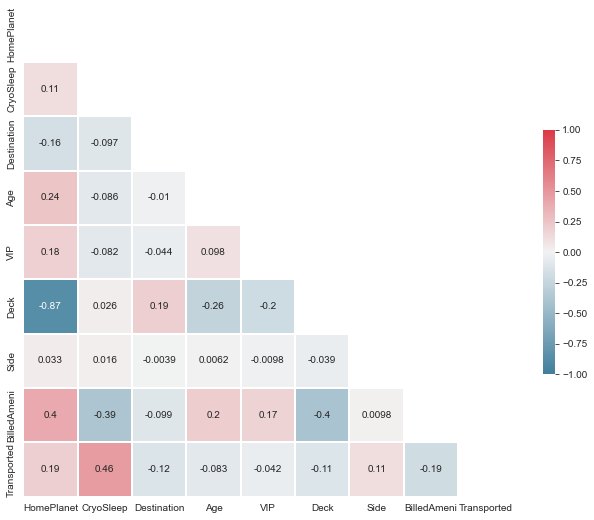

In [427]:
corr = train_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, annot_kws={"size": 10},
            vmin=-1, vmax=1, center=0, square=True, linewidths=0.1,
            cbar_kws={"shrink": .5})

In [428]:
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

In [429]:
pca = PCA(n_components=0.95)
scale = StandardScaler()
scale.fit(X)
X = scale.fit_transform(X)

pca.fit(X)
X = pca.transform(X)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25)

model = RandomForestClassifier(random_state=1)
model.fit(train_X, train_y)
pred = model.predict(val_X)
rmse = mean_squared_error(pred, val_y, squared=False)

print(f'Model Error is: {round(rmse, 2)*100} %')

Model Error is: 53.0 %


In [430]:
scale.fit(test_data)
test_X=scale.fit_transform(test_data)
pca.fit(test_X)
test_X = pca.transform(test_X)

test_pred = model.predict(test_X)

predict_df = pd.DataFrame({'PassengerId': test_data.PassengerId,
                           'Transported': test_pred})

mapping = {1: 'True', 0: 'False'}
predict_df.replace({'Transported': mapping}, inplace=True)

predict_df.to_csv('./spaceship-titanic/submission.csv', index=False)

In [431]:
predict_df

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4269,9263_01,False
4270,9265_01,False
4271,9266_01,False
4272,9266_02,False
